In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

In [2]:
df_february = pd.read_csv("test1.csv")
df_may = pd.read_csv("test2.csv")
df_february.head(5).append(df_february.tail(5))

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05
331,2019-02-28,AU,control,53861,48482,41530.734091,2183,5.039255e+05
332,2019-02-28,BR,test,4129,3703,1917.595339,100,2.032529e+04
333,2019-02-28,BR,control,34450,31096,15142.516783,846,1.991500e+05
334,2019-02-28,JP,test,3844,3491,2451.847750,67,1.371000e+04
335,2019-02-28,JP,control,30346,27368,20287.690753,465,9.486661e+04


In [3]:
df_may.head(5).append(df_may.tail(5))

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount
0,2019-05-01,US,test,18978,16560,22868.156215,1400,3.079888e+05
1,2019-05-01,US,control,188086,169373,208131.939979,13558,2.780706e+06
2,2019-05-01,DE,test,8441,7358,5214.547510,348,6.683872e+04
3,2019-05-01,DE,control,90793,81661,55249.407028,3185,6.243513e+05
4,2019-05-01,UK,test,10907,9557,8853.686349,403,8.820581e+04
367,2019-05-31,AU,control,52765,47560,49945.837451,2382,5.026111e+05
368,2019-05-31,BR,test,3220,2804,1300.393503,95,1.963787e+04
369,2019-05-31,BR,control,29971,26943,10280.212939,767,1.571366e+05
370,2019-05-31,JP,test,4596,3986,3389.562888,103,2.119438e+04
371,2019-05-31,JP,control,45121,40554,26687.246918,874,1.726301e+05


In [4]:
df_february.shape, df_may.shape

((336, 8), (372, 8))

In [5]:
set(df_february.columns).difference(df_may.columns)

set()

In [6]:
df_february['outgoings'] = df_february.booking_amount - df_february.revenue
df_february.head()

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,outgoings
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04,8.167528e+04
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05,6.994274e+05
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05,8.986775e+04


In [7]:
df_may['outgoings'] = df_may.booking_amount - df_may.revenue
df_may.head()

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,outgoings
0,2019-05-01,US,test,18978,16560,22868.156215,1400,3.079888e+05,2.851206e+05
1,2019-05-01,US,control,188086,169373,208131.939979,13558,2.780706e+06,2.572574e+06
2,2019-05-01,DE,test,8441,7358,5214.547510,348,6.683872e+04,6.162417e+04
3,2019-05-01,DE,control,90793,81661,55249.407028,3185,6.243513e+05,5.691018e+05
4,2019-05-01,UK,test,10907,9557,8853.686349,403,8.820581e+04,7.935213e+04


In [8]:
platforms_feb = df_february.platform.unique()
platforms_may = df_may.platform.unique()
platforms_feb, platforms_may

(array(['US', 'DE', 'UK', 'AU', 'BR', 'JP'], dtype=object),
 array(['US', 'DE', 'UK', 'AU', 'BR', 'JP'], dtype=object))

In [9]:
df_february.columns

Index(['ymd', 'platform', 'group', 'visits', 'clicks', 'revenue', 'bookings',
       'booking_amount', 'outgoings'],
      dtype='object')

In [10]:
analysis_columns = ['visits', 'clicks', 'revenue', 'bookings',
                    'booking_amount', 'outgoings']

In [11]:
for col in analysis_columns:
  temp = df_february[col].groupby(df_february['platform']).mean().sort_values(ascending=False)
  temp2 = df_may[col].groupby(df_may['platform']).mean().sort_values(ascending=False)

  print("Average of FEBRUARY", col.upper(), "acording to the platform :", temp)
  print("Average of MAY", col.upper(), "acording to the platform :", temp2)

Average of FEBRUARY VISITS acording to the platform : platform
US    114395.910714
DE     57883.517857
UK     56236.214286
AU     28524.625000
BR     22479.517857
JP     17673.035714
Name: visits, dtype: float64
Average of MAY VISITS acording to the platform : platform
US    113416.709677
DE     56688.645161
UK     56249.532258
AU     28213.758065
BR     22537.080645
JP     17691.838710
Name: visits, dtype: float64
Average of FEBRUARY CLICKS acording to the platform : platform
US    102951.107143
DE     52109.160714
UK     50608.928571
AU     25678.946429
BR     20231.017857
JP     15897.196429
Name: clicks, dtype: float64
Average of MAY CLICKS acording to the platform : platform
US    101784.193548
DE     50879.790323
UK     50493.032258
AU     25334.612903
BR     20219.983871
JP     15868.096774
Name: clicks, dtype: float64
Average of FEBRUARY REVENUE acording to the platform : platform
US    132597.302722
UK     40674.899854
DE     35392.899449
AU     25980.170370
JP     12478.64441

In [12]:
total_revenue_feb = df_february['revenue'].groupby(df_february['platform']).sum().sort_values(ascending=False)
total_revenue_may = df_may['revenue'].groupby(df_may['platform']).sum().sort_values(ascending=False)

total_revenue_feb, total_revenue_may

(platform
 US    7.425449e+06
 UK    2.277794e+06
 DE    1.982002e+06
 AU    1.454890e+06
 JP    6.988041e+05
 BR    4.602724e+05
 Name: revenue, dtype: float64, platform
 US    8.229448e+06
 UK    2.504017e+06
 DE    2.248206e+06
 AU    1.549057e+06
 JP    7.593058e+05
 BR    5.464671e+05
 Name: revenue, dtype: float64)

In [13]:
america = df_february[df_february['platform'] == 'US']
america_may = df_may[df_may['platform'] == 'US']
len(america) , len(america_may)

(56, 62)

In [14]:
deutschland = df_february[df_february['platform'] == 'DE']
deutschland_may = df_may[df_may['platform'] == 'DE']

len(deutschland), len(deutschland_may)

(56, 62)

In [15]:
america.shape, deutschland.shape, america_may.shape, deutschland_may.shape

((56, 9), (56, 9), (62, 9), (62, 9))

In [16]:
for plat in platforms_feb:
  print(plat)
  print("This is it like in FEB" , len(df_february[df_february['platform'] == plat]))
  print("This is it like in MAY" , len(df_may[df_may['platform'] == plat]))


US
This is it like in FEB 56
This is it like in MAY 62
DE
This is it like in FEB 56
This is it like in MAY 62
UK
This is it like in FEB 56
This is it like in MAY 62
AU
This is it like in FEB 56
This is it like in MAY 62
BR
This is it like in FEB 56
This is it like in MAY 62
JP
This is it like in FEB 56
This is it like in MAY 62


In [17]:
pip install sns

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
df_february.dtypes

ymd                object
platform           object
group              object
visits              int64
clicks              int64
revenue           float64
bookings            int64
booking_amount    float64
outgoings         float64
dtype: object

#ymd = df_february['ymd'].astype(str).astype('Int64')
df_february['date'] = pd.to_datetime(df_february['ymd'], format="%Y/%m/%d")

In [19]:
df_february.head()

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,outgoings
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04,8.167528e+04
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05,6.994274e+05
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05,8.986775e+04


In [20]:
df_february_new = df_february.copy()
df_february_new = df_february_new.reset_index()
df_february_new = df_february_new.set_index('ymd',inplace=False)
df_february_new.head()

,index,platform,group,visits,clicks,revenue,bookings,booking_amount,outgoings
ymd,,,,,,,,,
2019-02-01,0,US,test,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05
2019-02-01,1,US,control,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06
2019-02-01,2,DE,test,14788,13273,10381.106892,492,9.205639e+04,8.167528e+04
2019-02-01,3,DE,control,106112,95555,72563.524075,3621,7.719909e+05,6.994274e+05
2019-02-01,4,UK,test,13823,12441,10472.761095,486,1.003405e+05,8.986775e+04


In [21]:
figParams = pyplot.rcParams["figure.figsize"]
figParams[0] = 15
figParams[1] = 6
pyplot.rcParams["figure.figsize"] = figParams

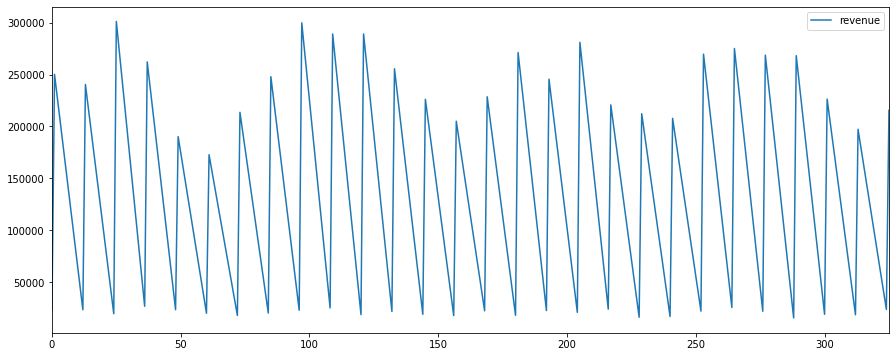

In [22]:
america[["revenue"]].head(400).plot()

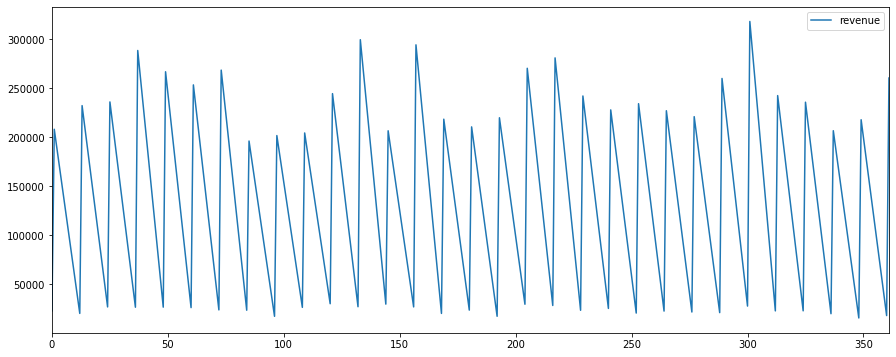

In [23]:
america_may[["revenue"]].head(400).plot()

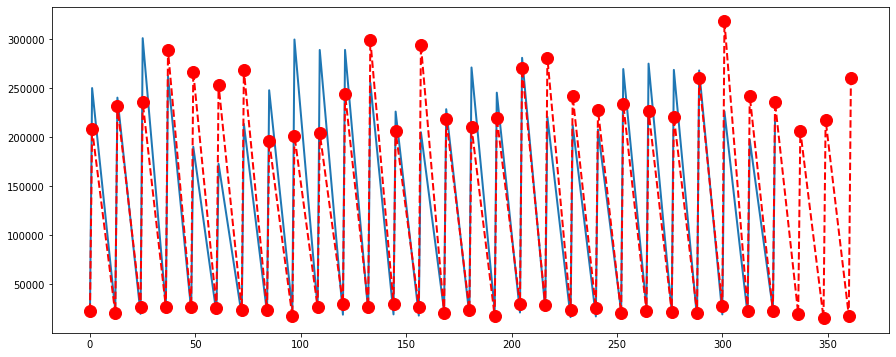

In [24]:
pyplot.plot(america[["revenue"]][0:400], linewidth=2, markersize=12)
pyplot.plot(america_may[["revenue"]][0:400], color='red', linewidth=2, markersize=12, marker='o', linestyle='dashed',)
pyplot.show()

In [25]:
df_february[['visits', 'clicks']]#,	'revenue',	'bookings',	'booking_amount',	'outgoings'].dtypes

,visits,clicks
0,19219,17289
1,204923,184276
2,14788,13273
3,106112,95555
4,13823,12441
...,...,...
331,53861,48482
332,4129,3703
333,34450,31096
334,3844,3491


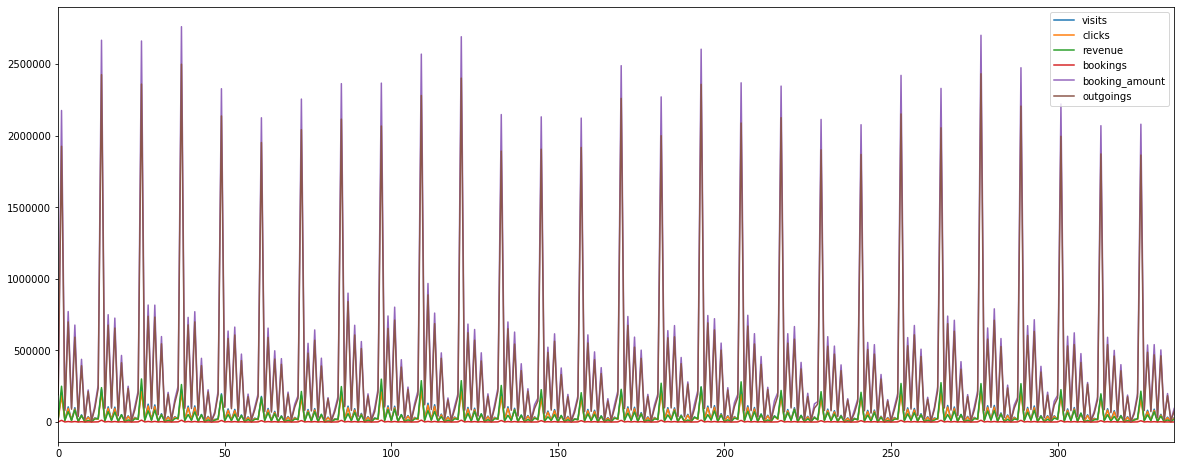

In [26]:
df_february[['visits', 'clicks',	'revenue',	'bookings',	'booking_amount',	'outgoings']][:350].plot(figsize=(20,8))

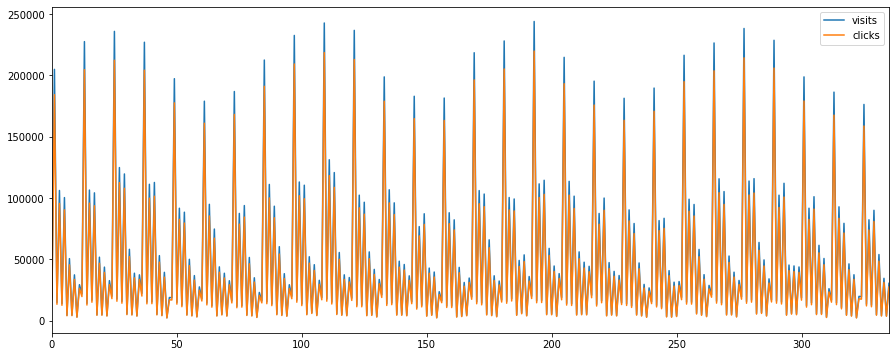

In [27]:
df_february[['visits', 'clicks']][:350].plot(figsize=(15,6))

In [28]:
comparison_columns = ['visits', 'clicks', 'bookings',
       'booking_amount', 'outgoings']

In [29]:
def compare_correlation_graph(df_february):
  for colu in comparison_columns:
    df_february[[colu, 'revenue']][:350].plot(figsize=(15,6))
    #return colu
    #df_february[colu, 'renevue'][:350].plot(figsize=(20,8))

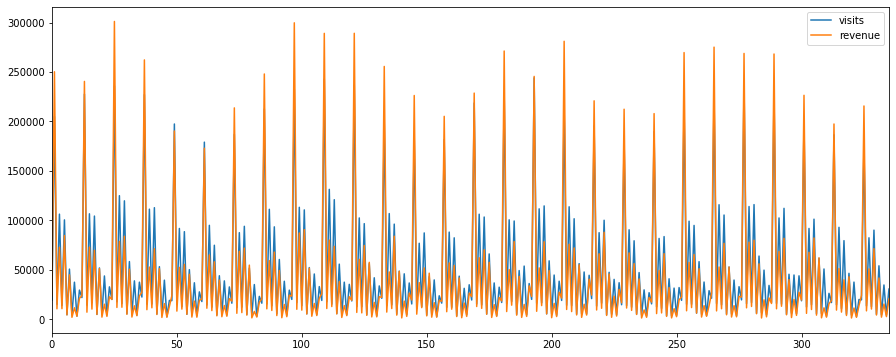

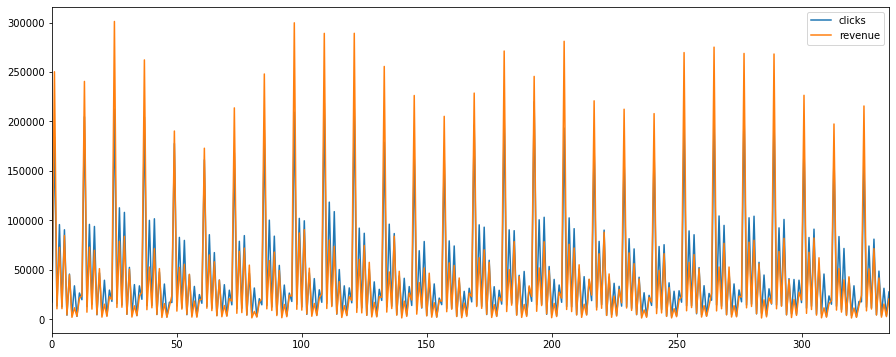

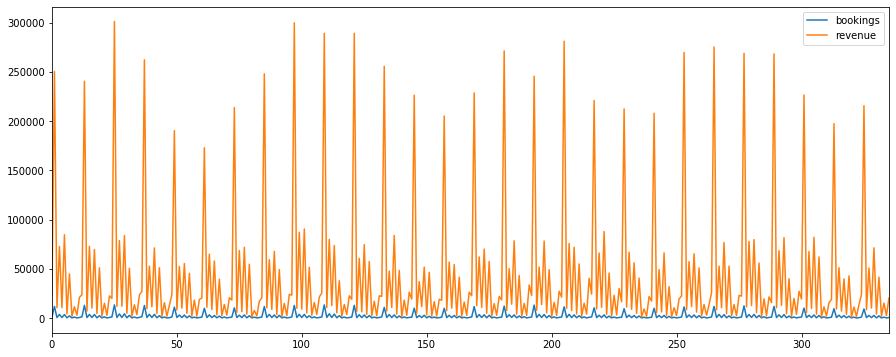

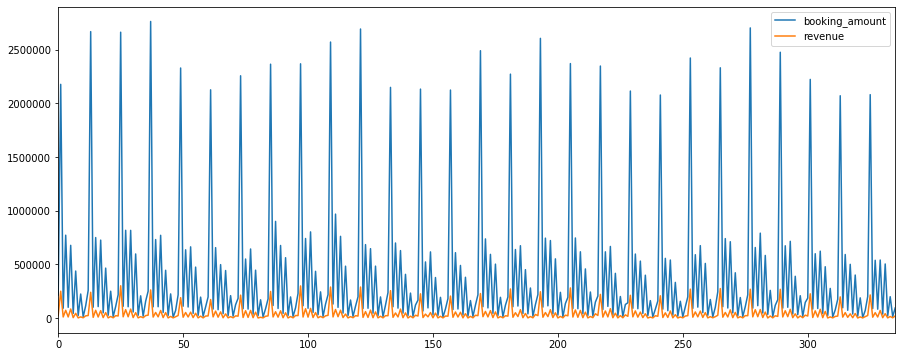

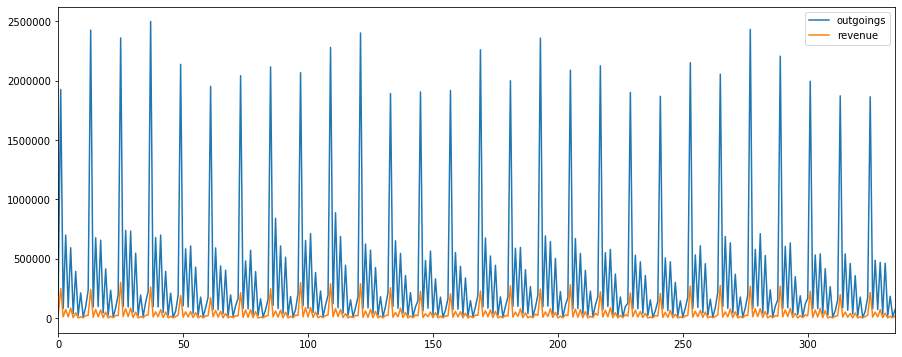

In [30]:
compare_correlation_graph(df_february)

In [31]:
#Calculate correlations
corr = df_february.corr()
corr

,visits,clicks,revenue,bookings,booking_amount,outgoings
visits,1.000000,0.999999,0.958942,0.969488,0.967297,0.966728
clicks,0.999999,1.000000,0.958919,0.969460,0.967267,0.966698
revenue,0.958942,0.958919,1.000000,0.990872,0.987703,0.984710
bookings,0.969488,0.969460,0.990872,1.000000,0.997687,0.996891
booking_amount,0.967297,0.967267,0.987703,0.997687,1.000000,0.999836
outgoings,0.966728,0.966698,0.984710,0.996891,0.999836,1.000000


In [94]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.5
top_corr_columns = cr.loc[:, 'revenue'][:6]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.95].sort_values(ascending=False)
len(best_accurate_columns)
best_accurate_columns


revenue           1.000000
bookings          0.990872
booking_amount    0.987703
outgoings         0.984710
visits            0.958942
clicks            0.958919
Name: revenue, dtype: float64

In [33]:
best_accurate_columns

revenue           1.000000
bookings          0.990872
booking_amount    0.987703
visits            0.958942
clicks            0.958919
Name: revenue, dtype: float64

In [34]:
train_df = df_february[best_accurate_columns.keys()]
train_df.head(2)

,revenue,bookings,booking_amount,visits,clicks
0,23752.189583,1072,2.152443e+05,19219,17289
1,250169.068436,11775,2.176644e+06,204923,184276


count       336.000000
mean      42557.177788
std       65879.091350
min        1072.443873
25%        5483.238381
50%       16714.209520
75%       51508.986848
max      301058.176189
Name: revenue, dtype: float64


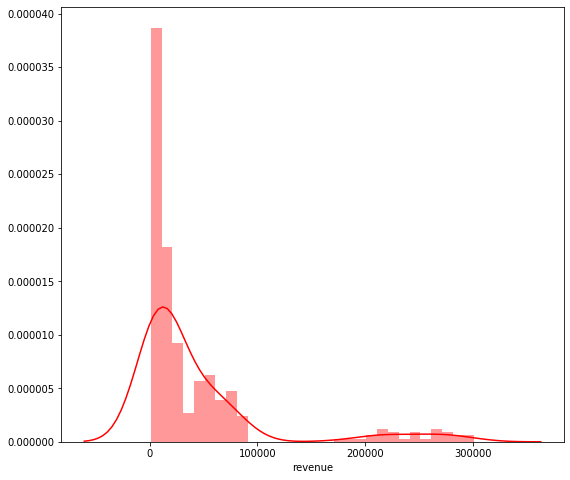

In [35]:
print(df_february['revenue'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_february['revenue'], color='r', bins=30, hist_kws={'alpha': 0.4});

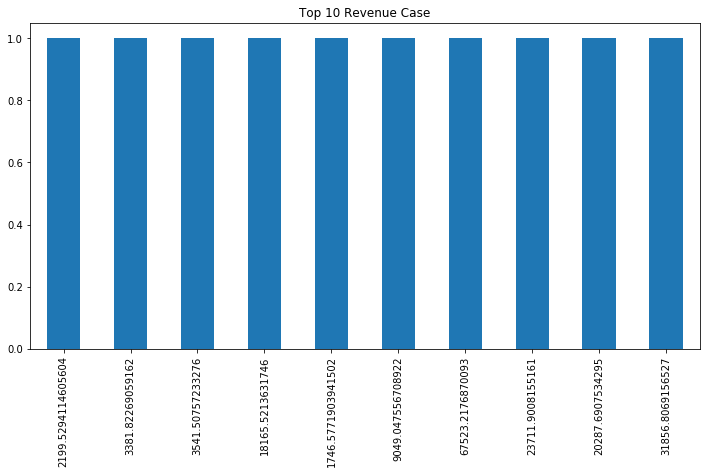

In [36]:
# Top 10 High Scored House
plot = df_february.revenue.value_counts().nlargest(10).plot(kind='bar', title="Top 10 Revenue Case", figsize=(12,6))

In [37]:
# Replace Numpy Nan values with 0 and 'nan'
for col in df_february[best_accurate_columns.keys()]:
  df_february[col].fillna(value=0, inplace=True)

In [38]:
df_february.columns

Index(['ymd', 'platform', 'group', 'visits', 'clicks', 'revenue', 'bookings',
       'booking_amount', 'outgoings'],
      dtype='object')

In [39]:
qualitative_columns = ['platform', 'group']
quantative_columns = ['visits', 'clicks', 'revenue', 'bookings',
                       'booking_amount', 'outgoings']

In [40]:
for index in qualitative_columns:
  df_february = pd.concat([df_february.drop(index, axis=1), pd.get_dummies(df_february[index], dummy_na=True, prefix=index)], axis=1) 
  df_february.shape

In [41]:
df_february.shape

(336, 17)

In [42]:
df_february.head(5)

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,0,0,1,0,0,1,0
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,0,0,1,0,1,0,0
2,2019-02-01,14788,13273,10381.106892,492,9.205639e+04,8.167528e+04,0,0,1,0,0,0,0,0,1,0
3,2019-02-01,106112,95555,72563.524075,3621,7.719909e+05,6.994274e+05,0,0,1,0,0,0,0,1,0,0
4,2019-02-01,13823,12441,10472.761095,486,1.003405e+05,8.986775e+04,0,0,0,0,1,0,0,0,1,0


In [43]:
from datetime import datetime
import itertools
from sklearn.cluster import MeanShift, estimate_bandwidth


In [44]:
# Replace Numpy Nan values with 0 and 'nan'
for col in df_february.columns:
  if df_february[col].dtypes == object:
    df_february[col].fillna(value='nan', inplace=True)
  else:
    df_february[col].fillna(value=0, inplace=True)

In [45]:
bins_methods = [ "auto", "fd", "doane", "scott", "stone", "rice", "sturges", "sqrt"]

In [46]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
  all_bins = []
  
  for method in bins_methods:
    start = datetime.now()
    hist, bin_edges = np.histogram(column_name,bins=method)
    all_bins.append(bin_edges)
    print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
  return all_bins

In [47]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1)

Method : auto    - Running Time : 0:00:00.001075 - Number of bins : 24    - Head : [ 1072.44387323 14115.30180001 27158.15972678] - Tail : [274972.46033547 288015.31826225]
Method : fd      - Running Time : 0:00:00.000498 - Number of bins : 24    - Head : [ 1072.44387323 14115.30180001 27158.15972678] - Tail : [274972.46033547 288015.31826225]
Method : doane   - Running Time : 0:00:00.000604 - Number of bins : 15    - Head : [ 1072.44387323 22499.9961815  43927.54848978] - Tail : [258203.07157248 279630.62388075]
Method : scott   - Running Time : 0:00:00.000380 - Number of bins : 11    - Head : [ 1072.44387323 31071.01710481 61069.59033639] - Tail : [241061.02972586 271059.60295744]
Method : stone   - Running Time : 0:00:00.014643 - Number of bins : 93    - Head : [1072.44387323 4333.15835493 7593.87283662] - Tail : [294536.74722563 297797.46170733]
Method : rice    - Running Time : 0:00:00.000276 - Number of bins : 15    - Head : [ 1072.44387323 22499.9961815  43927.54848978] - Tail :

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,0,0,1,0,0,1,0,0
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,0,0,1,0,1,0,0,8
334,2019-02-28,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,0,1,0,0,0,0,1,0,0
335,2019-02-28,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,0,1,0,0,0,1,0,0,0


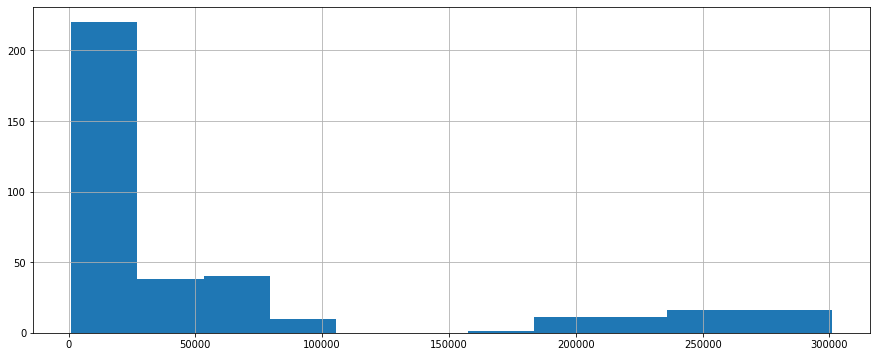

In [48]:
#Revenue Bins
all_bins_revenue = []
all_bins_revenue = get_columns_bins(df_february.revenue)

revenue_bin,label = get_clustering_bins(pd.Series(all_bins_revenue[0]), quantile=0.2, n_samples=10)
df_february.revenue.hist(bins=revenue_bin)
revenue_bin

df_february.revenue.value_counts().head()
df_february['revenue_cat'] = pd.cut(df_february.revenue, revenue_bin).cat.codes
df_february.head(2).append(df_february.tail(2))

In [49]:
for i in df_february.revenue_cat.unique():
  print(len(df_february[df_february.revenue_cat == i]))

220
16
40
10
38
11
1


In [50]:
"""
def get_bins(column, name):
  all_bins_param = []
  all_bins_param = get_columns_bins(column)
  #print("all_bins_param : ", all_bins_param)

  param_bin,label = get_clustering_bins(pd.Series(all_bins_param[0]), quantile=0.2, n_samples=10)
  #column.hist(bins=param_bin)
  param_bin

  print("********", param_bin, "********")

  print(len(param_bin) , column.value_counts(bins=param_bin))

  #column.value_counts().head()
  column = pd.cut(column, param_bin).cat.codes

  print("new column = ", column)

  df_february.head(2).append(df_february.tail(2))

  df_february[name].value_counts().head()
  df_february[[name]] = pd.cut(column, param_bin, include_lowest=False).cat.codes
  df_february.head(2).append(df_february.tail(2))
"""

'\ndef get_bins(column, name):\n  all_bins_param = []\n  all_bins_param = get_columns_bins(column)\n  #print("all_bins_param : ", all_bins_param)\n\n  param_bin,label = get_clustering_bins(pd.Series(all_bins_param[0]), quantile=0.2, n_samples=10)\n  #column.hist(bins=param_bin)\n  param_bin\n\n  print("********", param_bin, "********")\n\n  print(len(param_bin) , column.value_counts(bins=param_bin))\n\n  #column.value_counts().head()\n  column = pd.cut(column, param_bin).cat.codes\n\n  print("new column = ", column)\n\n  df_february.head(2).append(df_february.tail(2))\n\n  df_february[name].value_counts().head()\n  df_february[[name]] = pd.cut(column, param_bin, include_lowest=False).cat.codes\n  df_february.head(2).append(df_february.tail(2))\n'

In [51]:
"""
for qc in quantative_columns2:
  name = qc + "_cat"
  get_bins(df_february[qc], name)
  print(qc, " finished")
"""

'\nfor qc in quantative_columns2:\n  name = qc + "_cat"\n  get_bins(df_february[qc], name)\n  print(qc, " finished")\n'

In [52]:
df_february.revenue_cat.unique()

array([0, 8, 2, 3, 1, 7, 6])

In [53]:
quantative_columns

['visits', 'clicks', 'revenue', 'bookings', 'booking_amount', 'outgoings']

Method : auto    - Running Time : 0:00:00.000695 - Number of bins : 16    - Head : [ 2306.         18419.06666667 34532.13333333] - Tail : [211775.86666667 227888.93333333]
Method : fd      - Running Time : 0:00:00.000587 - Number of bins : 16    - Head : [ 2306.         18419.06666667 34532.13333333] - Tail : [211775.86666667 227888.93333333]
Method : doane   - Running Time : 0:00:00.000390 - Number of bins : 15    - Head : [ 2306. 19570. 36834.] - Tail : [209474. 226738.]
Method : scott   - Running Time : 0:00:00.000402 - Number of bins : 10    - Head : [ 2306.         29161.11111111 56016.22222222] - Tail : [190291.77777778 217146.88888889]
Method : stone   - Running Time : 0:00:00.016380 - Number of bins : 79    - Head : [2306.         5404.66666667 8503.33333333] - Tail : [237804.66666667 240903.33333333]
Method : rice    - Running Time : 0:00:00.000373 - Number of bins : 15    - Head : [ 2306. 19570. 36834.] - Tail : [209474. 226738.]
Method : sturges - Running Time : 0:00:00.000

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,0,0,1,0,0,1,0,0,1
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,0,0,1,0,1,0,0,8,6
334,2019-02-28,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,0,1,0,0,0,0,1,0,0,0
335,2019-02-28,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,0,1,0,0,0,1,0,0,0,1


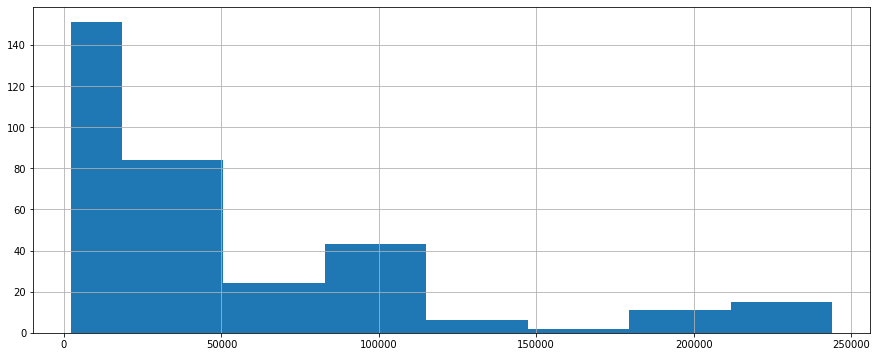

In [54]:
#Visits Bins
all_bins_visits = []
all_bins_visits = get_columns_bins(df_february.visits)

visits_bin,label = get_clustering_bins(pd.Series(all_bins_visits[0]), quantile=0.2, n_samples=10)
df_february.visits.hist(bins=visits_bin)
visits_bin

df_february.visits.value_counts().head()
df_february['visits_cat'] = pd.cut(df_february.visits, visits_bin).cat.codes
df_february.head(2).append(df_february.tail(2))

Method : auto    - Running Time : 0:00:00.000693 - Number of bins : 16    - Head : [ 2103.  16618.6 31134.2] - Tail : [190805.8 205321.4]
Method : fd      - Running Time : 0:00:00.000580 - Number of bins : 16    - Head : [ 2103.  16618.6 31134.2] - Tail : [190805.8 205321.4]
Method : doane   - Running Time : 0:00:00.000377 - Number of bins : 15    - Head : [ 2103.         17655.42857143 33207.85714286] - Tail : [188732.14285714 204284.57142857]
Method : scott   - Running Time : 0:00:00.000323 - Number of bins : 10    - Head : [ 2103.         26295.66666667 50488.33333333] - Tail : [171451.66666667 195644.33333333]
Method : stone   - Running Time : 0:00:00.016258 - Number of bins : 83    - Head : [2103.         4758.29268293 7413.58536585] - Tail : [214526.41463415 217181.70731707]
Method : rice    - Running Time : 0:00:00.000291 - Number of bins : 15    - Head : [ 2103.         17655.42857143 33207.85714286] - Tail : [188732.14285714 204284.57142857]
Method : sturges - Running Time : 0

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,0,0,1,0,0,1,0,0,1,1
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,0,0,1,0,1,0,0,8,6,6
334,2019-02-28,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,0,1,0,0,0,0,1,0,0,0,0
335,2019-02-28,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,0,1,0,0,0,1,0,0,0,1,1


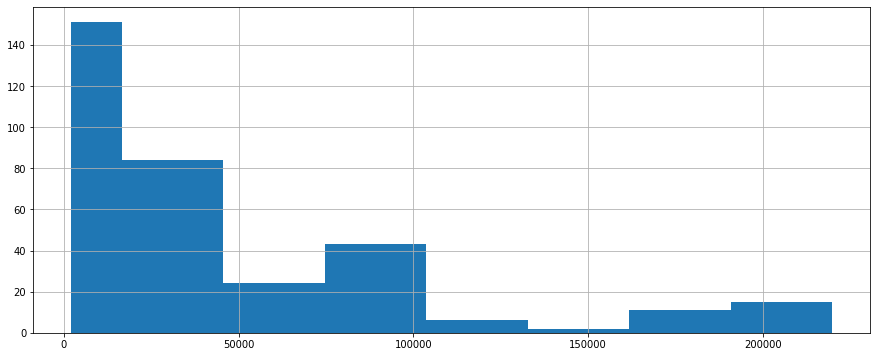

In [55]:
#Clicks' Bins
all_bins_clicks = []
all_bins_clicks = get_columns_bins(df_february.clicks)

clicks_bin,label = get_clustering_bins(pd.Series(all_bins_clicks[0]), quantile=0.2, n_samples=10)
df_february.clicks.hist(bins=clicks_bin)
clicks_bin

df_february.clicks.value_counts().head()
df_february['clicks_cat'] = pd.cut(df_february.clicks, clicks_bin).cat.codes
df_february.head(2).append(df_february.tail(2))

Method : auto    - Running Time : 0:00:00.000621 - Number of bins : 22    - Head : [  32.          665.95238095 1299.9047619 ] - Tail : [12077.0952381  12711.04761905]
Method : fd      - Running Time : 0:00:00.000330 - Number of bins : 22    - Head : [  32.          665.95238095 1299.9047619 ] - Tail : [12077.0952381  12711.04761905]
Method : doane   - Running Time : 0:00:00.000465 - Number of bins : 15    - Head : [  32.          982.92857143 1933.85714286] - Tail : [11443.14285714 12394.07142857]
Method : scott   - Running Time : 0:00:00.000319 - Number of bins : 10    - Head : [  32.         1511.22222222 2990.44444444] - Tail : [10386.55555556 11865.77777778]
Method : stone   - Running Time : 0:00:00.013578 - Number of bins : 73    - Head : [ 32.         216.90277778 401.80555556] - Tail : [12975.19444444 13160.09722222]
Method : rice    - Running Time : 0:00:00.000314 - Number of bins : 15    - Head : [  32.          982.92857143 1933.85714286] - Tail : [11443.14285714 12394.07142

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,...,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat,bookings_cat
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,...,0,1,0,1,0,0,8,6,6,5
334,2019-02-28,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,0,...,0,0,0,0,1,0,0,0,0,0
335,2019-02-28,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,0,...,0,0,0,1,0,0,0,1,1,0


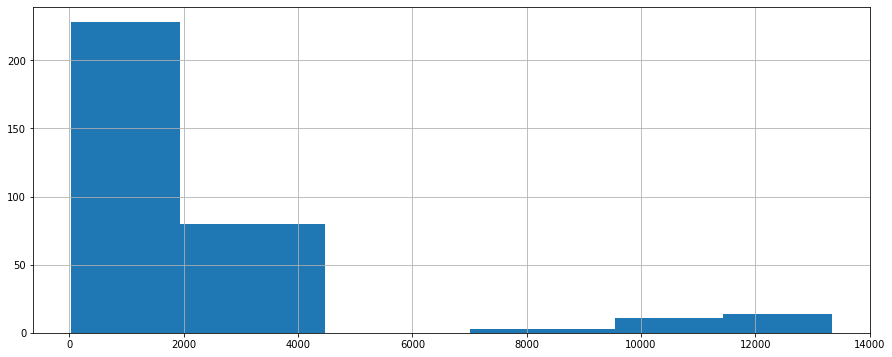

In [56]:
#Bookings Bins
all_bins_bookings = []
all_bins_bookings = get_columns_bins(df_february.bookings)

bookings_bin,label = get_clustering_bins(pd.Series(all_bins_bookings[0]), quantile=0.2, n_samples=10)
df_february.bookings.hist(bins=bookings_bin)
bookings_bin

df_february.bookings.value_counts().head()
df_february['bookings_cat'] = pd.cut(df_february.bookings, bookings_bin).cat.codes
df_february.head(2).append(df_february.tail(2))

Method : auto    - Running Time : 0:00:00.000609 - Number of bins : 22    - Head : [  5810.98948449 137065.85102061 268320.71255673] - Tail : [2499653.35867081 2630908.22020693]
Method : fd      - Running Time : 0:00:00.000397 - Number of bins : 22    - Head : [  5810.98948449 137065.85102061 268320.71255673] - Tail : [2499653.35867081 2630908.22020693]
Method : doane   - Running Time : 0:00:00.000389 - Number of bins : 15    - Head : [  5810.98948449 202693.28178867 399575.57409285] - Tail : [2368398.49713468 2565280.78943887]
Method : scott   - Running Time : 0:00:00.000294 - Number of bins : 10    - Head : [  5810.98948449 312072.33306877 618333.67665306] - Tail : [2149640.39457448 2455901.73815877]
Method : stone   - Running Time : 0:00:00.014789 - Number of bins : 72    - Head : [ 5810.98948449 44632.84993883 83454.71039318] - Tail : [2684519.36083436 2723341.2212887 ]
Method : rice    - Running Time : 0:00:00.000276 - Number of bins : 15    - Head : [  5810.98948449 202693.281788

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,...,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat,bookings_cat,booking_amount_cat
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,...,1,0,0,1,0,0,1,1,0,0
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,...,1,0,1,0,0,8,6,6,5,4
334,2019-02-28,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,0,...,0,0,0,1,0,0,0,0,0,0
335,2019-02-28,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,0,...,0,0,1,0,0,0,1,1,0,0


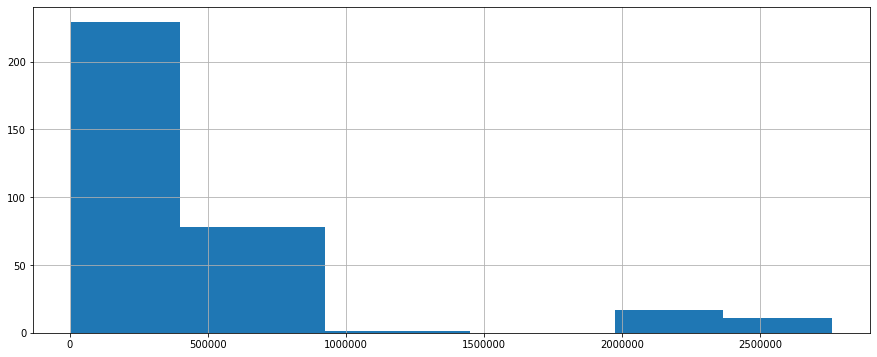

In [57]:
#Booking Amount Bins
all_bins_booking_amount = []
all_bins_booking_amount = get_columns_bins(df_february.booking_amount)

booking_amount_bin,label = get_clustering_bins(pd.Series(all_bins_booking_amount[0]), quantile=0.2, n_samples=10)
df_february.booking_amount.hist(bins=booking_amount_bin)
booking_amount_bin

df_february.booking_amount.value_counts().head()
df_february['booking_amount_cat'] = pd.cut(df_february.booking_amount, booking_amount_bin).cat.codes
df_february.head(2).append(df_february.tail(2))

Method : auto    - Running Time : 0:00:00.000675 - Number of bins : 22    - Head : [  4064.41229409 122918.51610659 241772.61991909] - Tail : [2262292.38473161 2381146.48854411]
Method : fd      - Running Time : 0:00:00.000432 - Number of bins : 22    - Head : [  4064.41229409 122918.51610659 241772.61991909] - Tail : [2262292.38473161 2381146.48854411]
Method : doane   - Running Time : 0:00:00.000354 - Number of bins : 15    - Head : [  4064.41229409 182345.56801284 360626.7237316 ] - Tail : [2143438.28091911 2321719.43663786]
Method : scott   - Running Time : 0:00:00.000314 - Number of bins : 10    - Head : [  4064.41229409 281390.65452326 558716.89675243] - Tail : [1945348.10789828 2222674.35012744]
Method : stone   - Running Time : 0:00:00.016593 - Number of bins : 101   - Head : [ 4064.41229409 29023.77409472 53983.13589534] - Tail : [2450081.86875536 2475041.23055599]
Method : rice    - Running Time : 0:00:00.000411 - Number of bins : 15    - Head : [  4064.41229409 182345.568012

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:785: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,...,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat,bookings_cat,booking_amount_cat,outgoings_cat
0,2019-02-01,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,2019-02-01,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,...,0,1,0,0,8,6,6,5,4,4
334,2019-02-28,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,0,...,0,0,1,0,0,0,0,0,0,0
335,2019-02-28,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,0,...,0,1,0,0,0,1,1,0,0,0


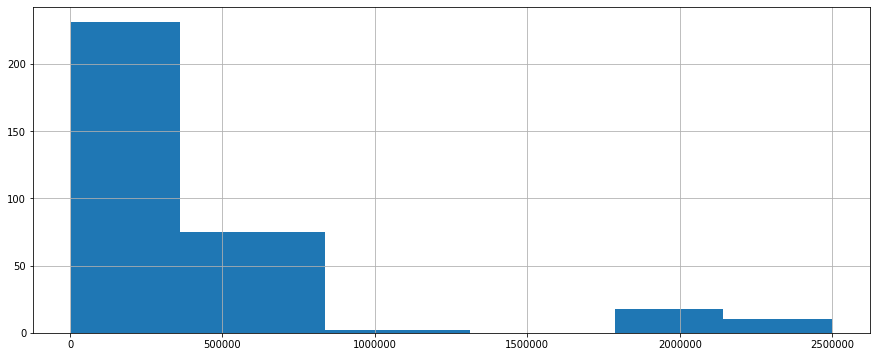

In [58]:
#Outgoings Bins
all_bins_outgoings = []
all_bins_outgoings = get_columns_bins(df_february.outgoings)

outgoings_bin,label = get_clustering_bins(pd.Series(all_bins_outgoings[0]), quantile=0.2, n_samples=10)
df_february.outgoings.hist(bins=outgoings_bin)
outgoings_bin

df_february.outgoings.value_counts().head()
df_february['outgoings_cat'] = pd.cut(df_february.outgoings, outgoings_bin).cat.codes
df_february.head(2).append(df_february.tail(2))

In [59]:
df_february.ymd = df_february.ymd.str.replace('-' , '')
df_february.ymd.head()

0    20190201
1    20190201
2    20190201
3    20190201
4    20190201
Name: ymd, dtype: object

In [60]:
# revenue columnları 2 tane yapılıyor

df_february["{}_2".format('revenue_cat')] = df_february["revenue_cat"]


In [61]:
# ymd columnları 2 tane yapılıyor

df_february["{}_3".format('ymd')] = df_february["ymd"]

In [62]:
df_february.columns

Index(['ymd', 'visits', 'clicks', 'revenue', 'bookings', 'booking_amount',
       'outgoings', 'platform_AU', 'platform_BR', 'platform_DE', 'platform_JP',
       'platform_UK', 'platform_US', 'platform_nan', 'group_control',
       'group_test', 'group_nan', 'revenue_cat', 'visits_cat', 'clicks_cat',
       'bookings_cat', 'booking_amount_cat', 'outgoings_cat', 'revenue_cat_2',
       'ymd_3'],
      dtype='object')

In [63]:
# booking columnları 2 tane yapılıyor

df_february["{}_2".format('bookings_cat')] = df_february["bookings_cat"]
df_february["{}_3".format('booking_amount_cat')] = df_february["booking_amount_cat"]

In [64]:
df_february.shape

(336, 27)

In [65]:
pip install hdbscan

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
import os
from collections import defaultdict
from datetime import datetime

from joblib import dump, load
from sklearn.cluster import MeanShift, estimate_bandwidth

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
import hdbscan

In [68]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [69]:
from collections import Counter, defaultdict

In [70]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=28, min_samples=10)
clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=28, min_samples=10, p=None,
        prediction_data=False)

In [71]:
#df_february = df_february.drop(df_february.ymd)
df_february.head()

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat,bookings_cat,booking_amount_cat,outgoings_cat,revenue_cat_2,ymd_3,bookings_cat_2,booking_amount_cat_3
0,20190201,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,20190201,0,0
1,20190201,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,0,0,0,1,0,1,0,0,8,6,6,5,4,4,8,20190201,5,4
2,20190201,14788,13273,10381.106892,492,9.205639e+04,8.167528e+04,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0
3,20190201,106112,95555,72563.524075,3621,7.719909e+05,6.994274e+05,0,0,1,0,0,0,0,1,0,0,2,3,3,1,1,1,2,20190201,1,1
4,20190201,13823,12441,10472.761095,486,1.003405e+05,8.986775e+04,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0


In [72]:
now = datetime.now()
print(now)
clusterer.fit(df_february)
end = datetime.now()
print(end)
print(end-now)

2020-05-03 15:56:44.962897
2020-05-03 15:56:44.974208
0:00:00.011311


In [73]:
clusterer.labels_.max(), clusterer.labels_.min()

(4, -1)

In [74]:
print(Counter(clusterer.labels_))


Counter({4: 84, 1: 81, 3: 72, 2: 46, 0: 28, -1: 25})


In [75]:
silhouette_avg_hdbscan = silhouette_score(df_february, clusterer.labels_)
print("For n_clusters =", clusterer.labels_.max, "The average silhouette_score is :", silhouette_avg_hdbscan)

For n_clusters = <built-in method max of numpy.ndarray object at 0x13a466c10> The average silhouette_score is : 0.6021047990800183


In [76]:
df_february['booking_clusters'] = clusterer.labels_

In [77]:
for i in df_february.booking_clusters.unique():
    print("For ", i, " cluster number : ", df_february[df_february.booking_clusters == i].shape)

For  2  cluster number :  (46, 28)
For  0  cluster number :  (28, 28)
For  3  cluster number :  (72, 28)
For  1  cluster number :  (81, 28)
For  4  cluster number :  (84, 28)
For  -1  cluster number :  (25, 28)


In [78]:
len(df_february[df_february.booking_clusters == -1])

25

In [79]:
if len(df_february[df_february.booking_clusters == -1]) > 24:
    clusterer2 = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=10)
    clusterer2

    now = datetime.now()
    print(now)
    clusterer2.fit(df_february[df_february.booking_clusters == -1])
    end = datetime.now()
    print(end)
    print(end-now)
    
    silhouette_avg_hdbscan2 = silhouette_score(df_february[df_february.booking_clusters == -1], clusterer2.labels_)
    print("For n_clusters =", clusterer2.labels_.max, "The average silhouette_score is :", silhouette_avg_hdbscan2)
    
    clusterer2.labels_.max(), clusterer2.labels_.min()
    
    print(Counter(clusterer2.labels_))

    df_february.loc[df_february.booking_clusters == -1,"booking_clusters"] = clusterer2.labels_ + 7
    
    # Un clustered rows
    df_february.loc[df_february.booking_clusters == 6,"booking_clusters"] = 20

2020-05-03 15:56:45.031463
2020-05-03 15:56:45.037055
0:00:00.005592
For n_clusters = <built-in method max of numpy.ndarray object at 0x13a4542b0> The average silhouette_score is : 0.677470969697065
Counter({1: 12, 0: 10, -1: 3})


In [80]:
clusterer2

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=10, p=None,
        prediction_data=False)

In [81]:
for i in df_february.booking_clusters.unique():
    print("For ", i, ". cluster number : ", df_february[df_february.booking_clusters == i].shape)

For  2 . cluster number :  (46, 28)
For  0 . cluster number :  (28, 28)
For  3 . cluster number :  (72, 28)
For  1 . cluster number :  (81, 28)
For  4 . cluster number :  (84, 28)
For  7 . cluster number :  (10, 28)
For  20 . cluster number :  (3, 28)
For  8 . cluster number :  (12, 28)


In [82]:
df_february[df_february.booking_clusters == df_february.booking_clusters.max()]

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat,bookings_cat,booking_amount_cat,outgoings_cat,revenue_cat_2,ymd_3,bookings_cat_2,booking_amount_cat_3,booking_clusters
87,20190208,111033,100055,59126.766008,3674,900507.565249,841380.799241,0,0,1,0,0,0,0,1,0,0,2,3,3,1,1,2,2,20190208,1,1,20
111,20190210,131203,118278,79869.538714,4310,968180.571588,888311.032874,0,0,1,0,0,0,0,1,0,0,3,4,4,1,2,2,3,20190210,1,2,20
247,20190221,40719,36643,31856.806916,1658,332335.611550,300478.804635,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,20190221,0,0,20


In [83]:
from sklearn.cluster import KMeans

In [84]:
len(df_february[df_february.booking_clusters == df_february.booking_clusters.max()])

3

In [85]:
if len(df_february[df_february.booking_clusters == df_february.booking_clusters.max()]) > 2:
    now = datetime.now()
    print(now)

    K = 2
    km = KMeans(n_clusters=K).fit(df_february[df_february.booking_clusters == df_february.booking_clusters.max()])
    print(km)

    end = datetime.now()
    print(end)
    print(end-now)
    
    km.labels_.min(), km.labels_.max()
    
    silhouette_avg_kmeans = silhouette_score(df_february[df_february.booking_clusters == df_february.booking_clusters.max()], km.labels_)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg_kmeans)
    
    df_february.loc[df_february.booking_clusters == df_february.booking_clusters.max(),"booking_clusters"] = km.labels_ + df_february.booking_clusters.max()

2020-05-03 15:56:45.114244
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
2020-05-03 15:56:45.127564
0:00:00.013320
For n_clusters = 2 The average silhouette_score is : 0.5951320111597637


In [86]:
for i in df_february.booking_clusters.unique():
    print("For ", i, " cluster number : ", df_february[df_february.booking_clusters == i].shape)

For  2  cluster number :  (46, 28)
For  0  cluster number :  (28, 28)
For  3  cluster number :  (72, 28)
For  1  cluster number :  (81, 28)
For  4  cluster number :  (84, 28)
For  7  cluster number :  (10, 28)
For  20  cluster number :  (2, 28)
For  8  cluster number :  (12, 28)
For  21  cluster number :  (1, 28)


In [87]:
df_february.booking_clusters.unique()

array([ 2,  0,  3,  1,  4,  7, 20,  8, 21])

In [88]:
#df_february.booking_clusters.groupby(df_february[df_february.group_test == 1])
df_february[df_february.group_test == 1].groupby(df_february.booking_clusters).head()

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,platform_JP,platform_UK,platform_US,platform_nan,group_control,group_test,group_nan,revenue_cat,visits_cat,clicks_cat,bookings_cat,booking_amount_cat,outgoings_cat,revenue_cat_2,ymd_3,bookings_cat_2,booking_amount_cat_3,booking_clusters
0,20190201,19219,17289,23752.189583,1072,215244.300977,191492.111394,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,20190201,0,0,2
2,20190201,14788,13273,10381.106892,492,92056.389656,81675.282764,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0,3
4,20190201,13823,12441,10472.761095,486,100340.507503,89867.746408,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0,3
6,20190201,4328,3904,4201.943812,203,43151.026293,38949.082481,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0,4
8,20190201,4465,4009,1763.200647,108,23903.665598,22140.464950,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0,4
10,20190201,2978,2700,2808.436795,60,11974.036075,9165.599279,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,20190201,0,0,4
12,20190202,21743,19563,23604.524803,1247,258142.783735,234538.258932,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,20190202,0,0,7
14,20190202,14054,12662,6934.259717,482,101557.490664,94623.230947,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20190202,0,0,3
16,20190202,16632,14943,10046.788263,533,107024.445610,96977.657347,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,20190202,0,0,3
18,20190202,4745,4285,4592.109153,220,48691.020925,44098.911771,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20190202,0,0,4


In [89]:
df_february.loc[df_february.group_test == 1, "booking_clusters"].groupby(df_february.booking_clusters).count()

booking_clusters
2    24
3    54
4    84
7     3
8     3
Name: booking_clusters, dtype: int64

In [90]:
df_february.loc[df_february.group_control == 1, "booking_clusters"].groupby(df_february.booking_clusters).count()

booking_clusters
0     28
1     81
2     22
3     18
7      7
8      9
20     2
21     1
Name: booking_clusters, dtype: int64

In [91]:
#Export dataframe as a csv
df_february.to_csv("february_with_clusters.csv", index=True)